In [45]:
#导入第三方包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import  stats
import scipy.stats.mstats as mst
from statsmodels.graphics.api import qqplot
dir = './data/'
df = pd.read_csv(dir+'week6.csv',engine='python',sep=",",index_col='date')
df['day_of_week']=df['day_of_week'].astype('str')
df.head(10)

,day_of_week,cnt,time
date,,,
4,6,4966,20080104
11,6,275,20080111
17,6,216,20080117
24,6,231,20080124
30,6,279,20080130
39,6,2847,20080208
46,6,186,20080215
52,6,87,20080221
58,6,180,20080227


In [46]:
#dateparse = lambda dates: pd.datetime.strptime(time, '%Y/%m/%d')
#data = pd.read_csv('mian.csv', parse_dates='time', index_col='time',date_parser=dateparse)

In [47]:
dta=df['cnt']
type(dta)

pandas.core.series.Series

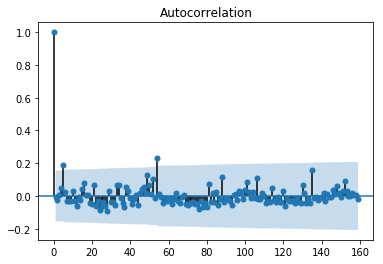

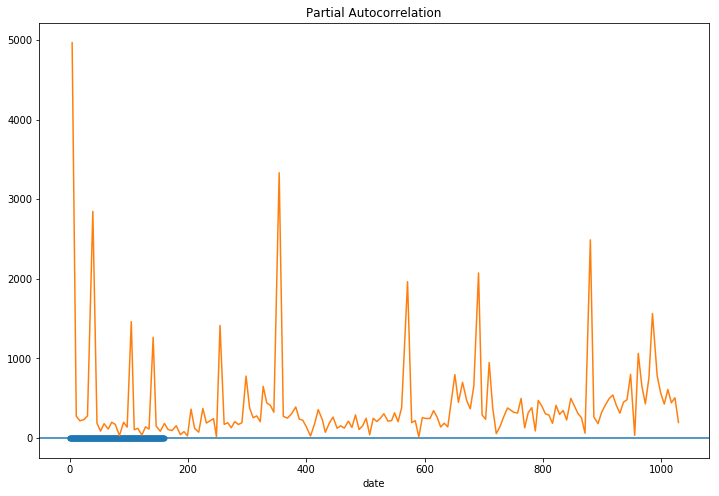

In [48]:

dta.plot(figsize=(12,8))
plt.show() 

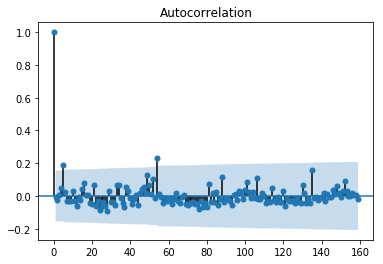

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(dta)

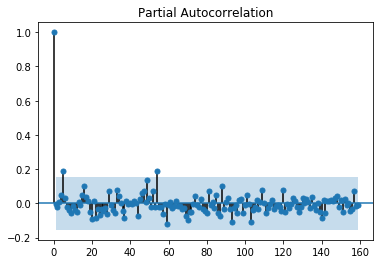

In [50]:
plot_pacf(dta)

In [51]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]#返回p值
testADF=test_stationarity(dta)
testADF

9.9682622979762481e-29

In [52]:
t = sm.tsa.stattools.adfuller(dta)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-15.83
p-value,9.96826e-29
Lags Used,0
Number of Observations Used,159
Critical Value(1%),-3.47216
Critical Value(5%),-2.8799
Critical Value(10%),-2.57656


In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#返回统计量和p值
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(dta, lags=1))
p_value1=acorr_ljungbox(dta, lags=1)[1]

差分序列的白噪声检验结果为： (array([ 0.0045742]), array([ 0.9460779]))


In [54]:
if(p_value1<0.05):
    print('P值小于0.05，序列为平稳非白噪声序列')
else:
    print('P值大于等于0.05，序列为白噪声序列')

P值大于等于0.05，序列为白噪声序列


In [55]:
#!usr/bin/env python
#-*- coding: utf-8 -*-
#回归base model初选

import sys
import os
import time
from sklearn import metrics
import numpy as np
from sklearn import model_selection
import datetime
import sklearn
import datetime


#reload(sys)
#sys.setdefaultencoding('utf8')


# KNN Regressor
def knn_Regressor(train_x, train_y):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Logistic Regression Regressor
def logistic_regression_Regressor(train_x, train_y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Random Forest Regressor
def random_forest_Regressor(train_x, train_y):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Decision Tree Regressor
def decision_tree_Regressor(train_x, train_y):
    from sklearn import tree
    model = tree.DecisionTreeRegressor()
    model.fit(train_x, train_y)
    return model

# AdaBoostRegressor
def AdaBoostRegressor(train_x, train_y):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor()
    model.fit(train_x, train_y)
    return model

# GBDT(Gradient Boosting Decision Tree) Regressor
def gradient_boosting_Regressor(train_x, train_y):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor()
    model.fit(train_x, train_y)
    return model


# SVM Regressor
def svm_Regressor(train_x, train_y):
    from sklearn.svm import SVR
    model = SVR()
    model.fit(train_x, train_y)
    return model

def SGDRegressor(train_x, train_y):
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=5,tol=None)
    model.fit(train_x, train_y)
    return model


#分割数据集，生成测试和训练集
def read_data(df):
    data=df[['time']]
    target=df['cnt']
    train_x, test_x, train_y, test_y= model_selection.train_test_split(data,target)
    return train_x, test_x, train_y, test_y,

if __name__ == '__main__':
    model_score={'KNN':0, 'LR':0, 'RF':0, 'DT':0, 'SVM':0, 'GBDT':0,'ADA':0,'SGD':0}
    test_Regressors = ['GBDT']
    Regressors = {'LR':logistic_regression_Regressor,
   'RF':random_forest_Regressor,
   'DT':decision_tree_Regressor,
  'SVM':svm_Regressor,'SGD':SGDRegressor,'KNN':knn_Regressor,
 'GBDT':gradient_boosting_Regressor,'ADA':AdaBoostRegressor
    }




    print('******************** Strating *********************')


    starttime = datetime.datetime.now()
    name=''
    temp=0
   
    for i in range(1,101):
        train_x, test_x, train_y, test_y = read_data(df)
        print(i)
        print('model training and testing data...')
        for Regressor in test_Regressors:	
            #print('******************* %s ********************' % Regressor)	
            start_time = time.time()	
            model = Regressors[Regressor](train_x, train_y)	
            #print('training took %fs!' % (time.time() - start_time))	
            predict = model.predict(test_x)
            p=predict.astype(int)
            #模型拟合测试集
            from sklearn import metrics
            # 用scikit-learn计算MSE
            mse=metrics.mean_squared_error(test_y, p)
            #print(mse)
            if(temp==0):
                temp=mse
                name=Regressor
                save_model=model
            else:
                if(temp>mse):
                    temp=mse
                    name=Regressor
                    model_score[Regressor]=model_score[Regressor]+1
                    save_model=model
        i=i+1

    endtime = datetime.datetime.now()
    print('training took %fs!' % (endtime - starttime).seconds)
    print('model name: %s' % name)
    print('lowestmse')
    print(temp)
    print(model_score)
    from sklearn.externals import joblib
    joblib.dump(save_model, dir+'my_model-week6.pkl')
    predict = save_model.predict(test_x)
    print(predict)

******************** Strating *********************
1
model training and testing data...
2
model training and testing data...
3
model training and testing data...
4
model training and testing data...
5
model training and testing data...
6
model training and testing data...
7
model training and testing data...
8
model training and testing data...
9
model training and testing data...
10
model training and testing data...
11
model training and testing data...
12
model training and testing data...
13
model training and testing data...
14
model training and testing data...
15
model training and testing data...
16
model training and testing data...
17
model training and testing data...
18
model training and testing data...
19
model training and testing data...
20
model training and testing data...
21
model training and testing data...
22
model training and testing data...
23
model training and testing data...
24
model training and testing data...
25
model training and testing data...
26
mode